In [0]:
import numpy as np
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
df=pd.read_csv("https://raw.githubusercontent.com/if1015-datascience/material/gh-pages/data/blood_pressure.csv",encoding = "ISO-8859-1")

In [2]:
df.head()

,patient,sex,agegrp,bp_before,bp_after
0,1,Male,30-45,143,153
1,2,Male,30-45,163,170
2,3,Male,30-45,153,168
3,4,Male,30-45,153,142
4,5,Male,30-45,146,141


In [3]:
df[['bp_before','bp_after']].describe()

,bp_before,bp_after
count,120.000000,120.000000
mean,156.450000,151.358333
std,11.389845,14.177622
min,138.000000,125.000000
25%,147.000000,140.750000
50%,154.500000,149.500000
75%,164.000000,161.000000
max,185.000000,185.000000


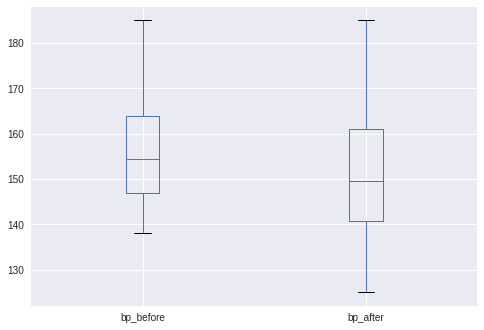

In [4]:
df[['bp_before', 'bp_after']].plot(kind='box')

In [0]:
#Verificando se a diferença segue a gaussiana
df['bp_difference'] = df['bp_before'] - df['bp_after']

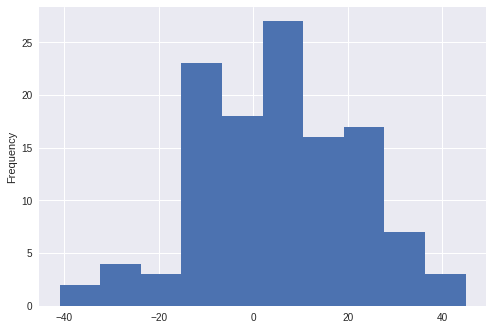

In [6]:
df['bp_difference'].plot(kind='hist')

In [7]:
#Shapiro-Wilk test de normalidade (valor,p-value)
stats.shapiro(df['bp_difference'])

(0.9926842451095581, 0.7841846942901611)

In [8]:
#Executando o teste t-test
stats.ttest_rel(df['bp_before'], df['bp_after'])

Ttest_relResult(statistic=3.3371870510833657, pvalue=0.0011297914644840823)

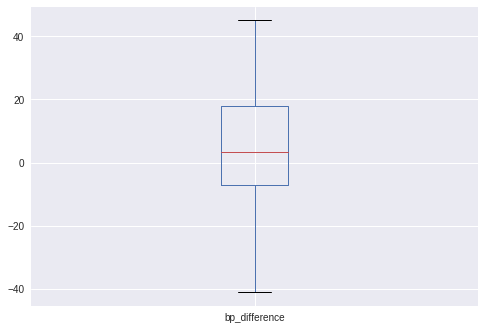

In [9]:
#Checando simetria
df['bp_difference'] = df['bp_before'] - df['bp_after']
df[['bp_difference']].plot(kind='box')

In [10]:
stats.wilcoxon(df['bp_before'], df['bp_after'])

WilcoxonResult(statistic=2234.5, pvalue=0.0014107333565442858)

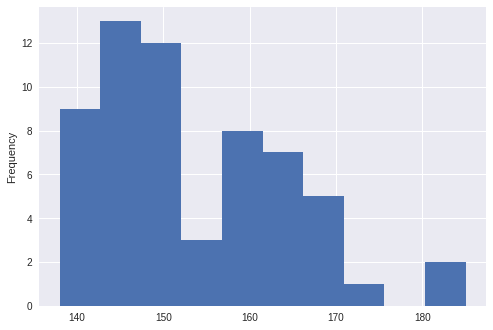

In [11]:
df[df['sex'] == 'Female']['bp_before'].plot(kind='hist')

In [13]:
stats.shapiro(df[df['sex'] == 'Female']['bp_before'])

(0.9277511835098267, 0.001596352318301797)

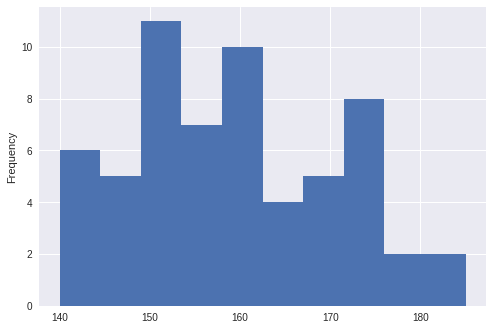

In [12]:
df[df['sex'] == 'Male']['bp_before'].plot(kind='hist')

In [14]:
stats.shapiro(df[df['sex'] == 'Male']['bp_before'])

(0.9689898490905762, 0.13019868731498718)

In [15]:
stats.mannwhitneyu(df[df['sex'] == 'Male']['bp_before'],df[df['sex'] == 'Female']['bp_before'])

MannwhitneyuResult(statistic=1261.5, pvalue=0.0023602725314639354)

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:454: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)


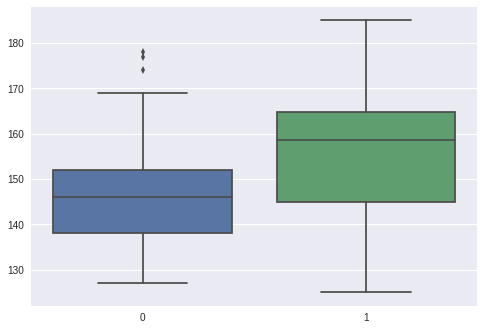

In [17]:
import seaborn as sns
data1 = df[df['sex'] == 'Female']['bp_after']
data2 = df[df['sex'] == 'Male']['bp_after']
sns.boxplot(data=[data1, data2])

In [13]:
houses=pd.read_csv("https://raw.githubusercontent.com/if1015-datascience/material/gh-pages/data/recife.csv",encoding = "ISO-8859-1")
houses = houses[houses['price'] > 30000]
houses['price_m2'] = houses['price']/houses['area']
houses.head()

,price,latitude,longitude,bedrooms,area,pkspaces,bathrooms,ensuites,suburb,district,city,state,type,price_m2
1,330000,-8.029595,-34.900372,3.0,86.0,1.0,3.0,1.0,Tamarineira,Recife,Recife,Pernambuco,apart,3837.209302
2,255000,-8.037247,-34.890986,2.0,82.0,1.0,2.0,NaN,Encruzilhada,Recife,Recife,Pernambuco,apart,3109.756098
3,380000,-8.047562,-34.876964,3.0,95.0,2.0,3.0,1.0,Santo Amaro,Recife,Recife,Pernambuco,apart,4000.000000
4,300000,-8.053580,-34.908733,3.0,97.0,1.0,3.0,1.0,Madalena,Recife,Recife,Pernambuco,apart,3092.783505
5,320000,-8.026516,-34.917791,2.0,50.0,1.0,2.0,1.0,Casa Amarela,Recife,Recife,Pernambuco,apart,6400.000000


## Exercício 1: Verifique se existe diferença para imóveis à venda entre em termos de preço, preço m2 e área entre apartamentos e casas usando testes estatísticos e visualize as distribuições com boxplots.

In [14]:
stats.mannwhitneyu(houses[houses['type'] == 'apart']['price'],houses[houses['type'] == 'house']['price'])

MannwhitneyuResult(statistic=36320.5, pvalue=0.04210920423317538)

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:454: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)


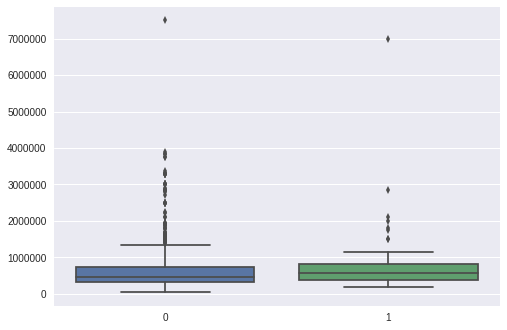

In [15]:
import seaborn as sns
data1 = houses[houses['type'] == 'apart']['price']
data2 = houses[houses['type'] == 'house']['price']
sns.boxplot(data=[data1, data2])

In [25]:
stats.mannwhitneyu(houses[houses['type'] == 'apart']['price_m2'],houses[houses['type'] == 'house']['price_m2'])

MannwhitneyuResult(statistic=18156.0, pvalue=6.741754203863054e-16)

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:454: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)


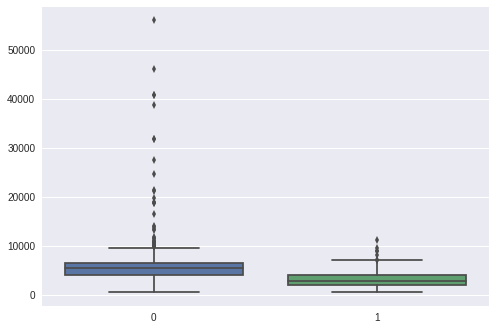

In [65]:
data1 = houses[houses['type'] == 'apart']['price_m2']
data2 = houses[houses['type'] == 'house']['price_m2']
sns.boxplot(data=[data1, data2])

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:454: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)


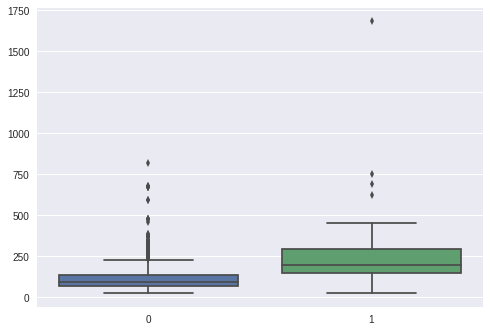

In [16]:
data1 = houses[houses['type'] == 'apart']['area']
data2 = houses[houses['type'] == 'house']['area']
sns.boxplot(data=[data1, data2])

## Exercício 2: Realize a mesma análise comparando dois bairros que possuam um grande número de imóveis nos dados.

In [78]:
houses.groupby('suburb')['suburb'].count()

suburb
Aflitos              53
Apipucos             17
Areias                3
Arruda               11
Boa Viagem          159
Boa Vista             6
Campo Grande         25
Casa Amarela         82
Casa Forte           64
CaxangÌÁ              6
Coelhos               1
Cohab                 3
Cordeiro             31
Derby                 4
Encruzilhada         62
Engenho do Meio       3
Espinheiro           67
FundÌ£o               1
GraÌ¤as              55
HipÌ_dromo            8
Ibura                 3
Ilha do Retiro       12
Imbiribeira          15
Ipsep                 5
Iputinga              6
Jaqueira             29
Madalena             68
Mangabeira            2
Monteiro              7
Parnamirim           42
Pau-Ferro             2
Pina                 13
Ponto de Parada       4
Porto da Madeira      1
PoÌ¤o                22
Prado                17
Rosarinho            16
San Martin            6
Santana               5
Santo Amaro         108
Santo AntÌ«nio        1
Soledade 

In [50]:
stats.mannwhitneyu(houses[houses['suburb'] == 'Boa Viagem']['price'],houses[houses['suburb'] == 'Casa Amarela']['price'])

MannwhitneyuResult(statistic=5104.0, pvalue=0.0029001224383961408)

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:454: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)


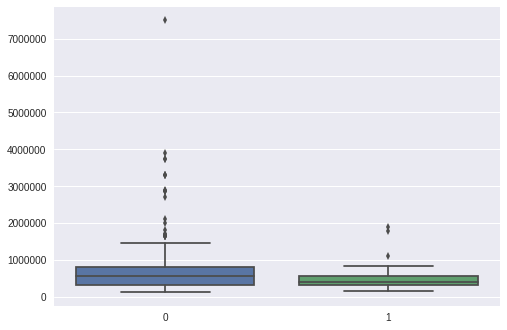

In [51]:
data1 = houses[houses['suburb'] == 'Boa Viagem']['price']
data2 = houses[houses['suburb'] == 'Casa Amarela']['price']
sns.boxplot(data=[data1, data2])


In [46]:
stats.mannwhitneyu(houses[houses['suburb'] == 'Boa Viagem']['price_m2'],houses[houses['suburb'] == 'Casa Amarela']['price_m2'])

MannwhitneyuResult(statistic=6431.0, pvalue=0.4322509616015574)

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:454: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)


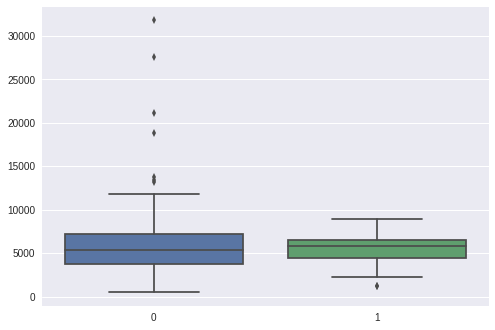

In [48]:
import seaborn as sns
data1 = houses[houses['suburb'] == 'Boa Viagem']['price_m2']
data2 = houses[houses['suburb'] == 'Casa Amarela']['price_m2']
sns.boxplot(data=[data1, data2])


/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:454: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)


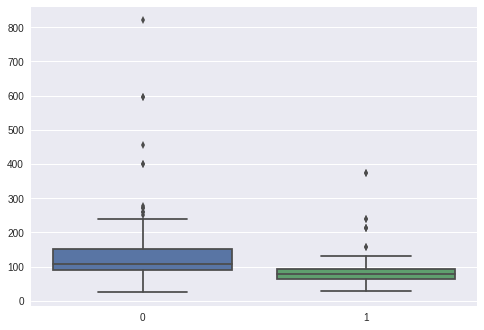

In [52]:
data1 = houses[houses['suburb'] == 'Boa Viagem']['area']
data2 = houses[houses['suburb'] == 'Casa Amarela']['area']
sns.boxplot(data=[data1, data2])

In [64]:
print(len(houses[(houses['suburb'] == 'Boa Viagem') & (houses['type'] == 'house')])/len(houses[houses['suburb'] == 'Boa Viagem']))
print(len(houses[(houses['suburb'] == 'Casa Amarela') & (houses['type'] == 'house')])/len(houses[houses['suburb'] == 'Casa Amarela']))

0.025157232704402517
0.07317073170731707
